In [2]:
## CREATE AN ARRAY FROM THREE DATES
import numpy as np
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64')
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[h]')
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[Y]')
np.arange('2018-06-01', '2018-06-23', 7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [6]:
import pandas as pd
idx = pd.date_range('7/8/2018', periods=7, freq='D')
idx = pd.to_datetime(['Jan 01, 2018','1/2/18','03-Jan-2018',None])

some_dates = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')
idx = pd.DatetimeIndex(some_dates)


In [7]:
# Create some random data
data = np.random.randn(3,2)
cols = ['A','B']
df = pd.DataFrame(data,idx,cols)
df.index


# Latest Date Value
df.index.max()

# Earliest Date Value
df.index.min()

# Earliest Date Index Location
df.index.argmin()

0

## Resampling

In [ ]:
df = pd.read_csv('../Data/starbucks.csv', index_col='Date', parse_dates=True)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [ ]:
df.resample(rule='A').apply(first_day)

df['Close'].resample('A').mean().plot.bar(title='Yearly Mean Closing Price for Starbucks');

## Time Shifting

In [ ]:
df.shift(1).head()

In [ ]:
# NOTE: You will lose that last piece of data that no longer has an index!
df.shift(1).tail()

In [ ]:
# Shift backwards
df.shift(-1).head()
df.shift(-1).tail()

## Shifting based on Time Series Frequency Code
We can choose to shift index values up or down without realigning the data by passing in a freq argument.
This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end.

In [9]:
# Shift everything forward one month
df.shift(periods=1, freq='M').head()

,A,B
2016-03-31,0.068608,0.157026
2017-05-31,1.396224,-0.599500
2018-08-31,0.804079,-1.040641


## Rolling and Expanding
A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a simple moving average. Let's show how to do this easily with pandas!

In [ ]:
# 7 day rolling mean
df.rolling(window=7).mean().head(15)


## Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

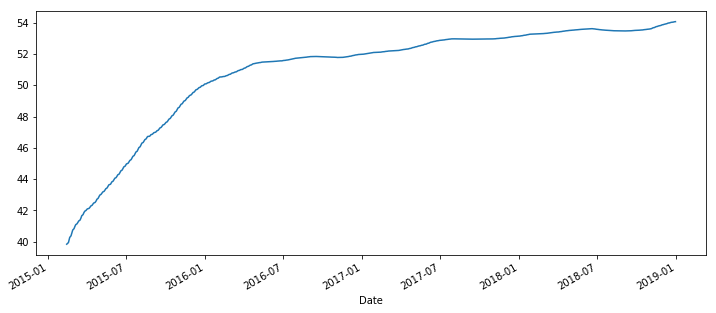

In [10]:
# df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

# Optional: specify a minimum number of periods to start from
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12,5));

That's it! It doesn't help much to visualize an expanding operation against the daily data, since all it really gives us is a picture of the "stability" or "volatility" of a stock. However, if you do want to see it, simply uncomment the first plot line above and rerun the cell.